In [1]:
import numpy as np
from scipy.optimize import curve_fit
import numpy.matlib
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as PathEffects
%matplotlib inline
import pandas as pd

In [2]:
plt.rc('lines', linewidth=3)
plt.rc('font', size = 40, family = 'monospace')
# plt.rc('font', size=48, family='serif', weight=500)
plt.rc('mathtext', fontset = 'dejavuserif')
plt.rc('axes', linewidth=6)
plt.rc('patch', linewidth=6)
plt.rc('xtick.major', width=5, size=20)
plt.rc('xtick.minor', width=4, size=15)
plt.rc('ytick.major', width=5, size=20)
plt.rc('ytick.minor', width=4, size=15)


In [4]:
data_path = "../csvs/other/"
p_adj = np.loadtxt(data_path + 'pratio.txt')
t_exit = np.loadtxt(data_path + 't_exit.txt')

In [5]:
# create a sliding window of t_exit.

t_exit_rolling = pd.DataFrame(t_exit)
t_exit_rolling = t_exit_rolling.rolling(10).median() 


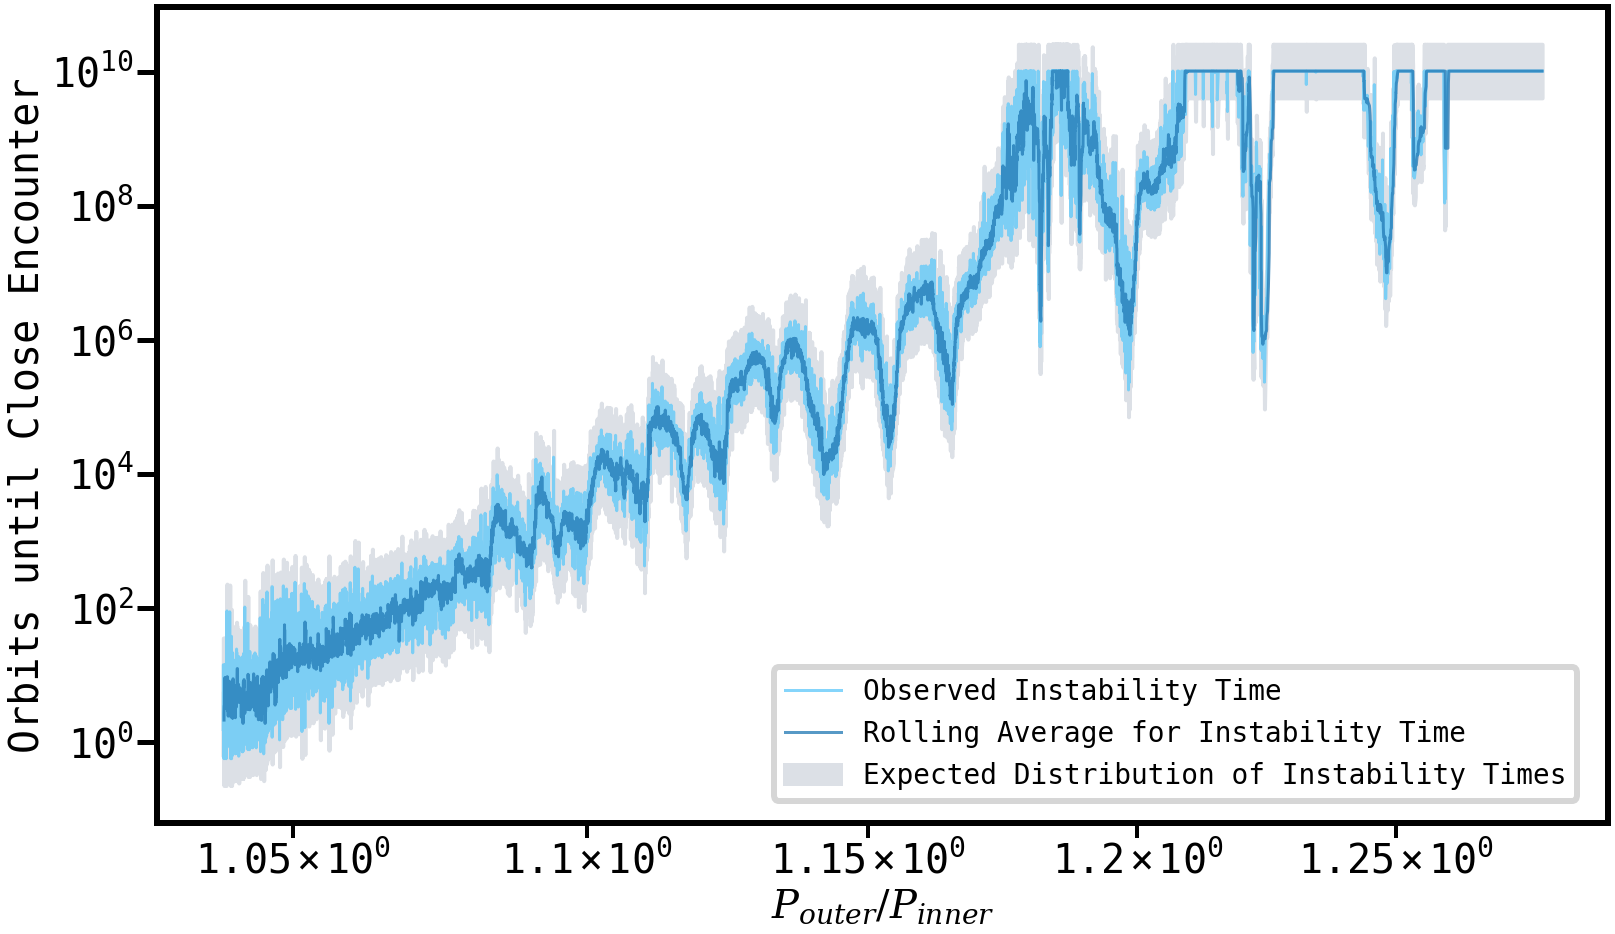

In [6]:
## log_t vs period ratio of nearest neighbours

fig, ax = plt.subplots(1, 1, figsize=(26,15))

ax.fill_between(p_adj, np.power(10, np.log10(t_exit)+0.4), np.power(10, np.log10(t_exit)-0.4),linewidth = 4, alpha = 1, color = '#dce0e6', label = "Expected Distribution of Instability Times")

ax.loglog(p_adj, t_exit, alpha = 0.75, color = '#5cc8fa', label = 'Observed Instability Time')
ax.loglog(p_adj, t_exit_rolling, alpha = 0.75, label = "Rolling Average for Instability Time")


ax.set_xlabel("$P_{outer}/P_{inner}$")
ax.set_ylabel("Orbits until Close Encounter")


fig.legend(fontsize = 'x-small', bbox_to_anchor=(0.85, 0.26))